
# Ensemble Learning of Autoencoders:



In [ ]:
#!pip uninstall -y tensorflow


In [1]:
!pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/57/cd/8c88b3b244de3acf379c5428da90e76b9a9eb25a4154fe949da34db430c1/tensorflow-2.13.1-cp38-cp38-macosx_10_15_x86_64.whl.metadata
  Using cached tensorflow-2.13.1-cp38-cp38-macosx_10_15_x86_64.whl.metadata (3.2 kB)
Using cached tensorflow-2.13.1-cp38-cp38-macosx_10_15_x86_64.whl (216.2 MB)


In [1]:
!pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/57/cd/8c88b3b244de3acf379c5428da90e76b9a9eb25a4154fe949da34db430c1/tensorflow-2.13.1-cp38-cp38-macosx_10_15_x86_64.whl.metadata
  Using cached tensorflow-2.13.1-cp38-cp38-macosx_10_15_x86_64.whl.metadata (3.2 kB)
Using cached tensorflow-2.13.1-cp38-cp38-macosx_10_15_x86_64.whl (216.2 MB)


In [ ]:
pip install --upgrade tensorflow keras

In [2]:
!pip install pandas

In [3]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/e3/52/fd60b0b022af41fbf3463587ddc719288f0f2d4e46603ab3184996cd5f04/scikit_learn-1.3.2-cp38-cp38-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 22.1 MB/s eta 0:00:0000:010:01
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [4]:
!pip install numpy

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


**Network Flow Group Autoencoder:**

In [2]:

network_flow_df = pd.read_csv('network_flow_features.csv', header=0)

# Convert the DataFrame to a NumPy array, retaining rows with "ff:ff:ff:ff:ff:ff"
network_flow_data = network_flow_df.values
#print(network_flow_data)


# Display unique values in each column
for column in network_flow_df.columns:
    unique_values = network_flow_df[column].unique()
    #print(f"Column: {column}, Unique Values: {unique_values}")
#print(network_flow_df.columns)
print(network_flow_df.isnull().sum())


src_ip                 0
dst_ip                 0
src_port             245
dst_port             245
packet_count           0
total_bytes            0
traffic_direction      0
first_timestamp        0
last_timestamp         0
dtype: int64


In [3]:
#data preprocessing:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split



# Drop rows with missing values in specific columns
network_flow_df.dropna(subset=['src_port', 'dst_port'], inplace=True)

# Define columns to be transformed:
numerical_features = ['src_port', 'dst_port', 'packet_count', 'total_bytes']
categorical_features = ['src_ip', 'dst_ip', 'traffic_direction']

# Separate categorical and numerical columns
X_numerical = network_flow_df[numerical_features]
X_categorical = network_flow_df[categorical_features]

# Apply numerical transformation (StandardScaler)
numerical_transformer = StandardScaler()
X_numerical_transformed = numerical_transformer.fit_transform(X_numerical)

# Apply categorical transformation (Label Encoding)
categorical_transformer = LabelEncoder()
X_categorical_transformed = X_categorical.apply(categorical_transformer.fit_transform)

# Combine transformed features
X_transformed = np.hstack([X_numerical_transformed, X_categorical_transformed])

# Create a DataFrame with transformed features and column names
all_column_names = numerical_features + categorical_features
df_preprocessed = pd.DataFrame(X_transformed, columns=all_column_names)

# Splitting the preprocessed data into 80% training and 20% testing
X_train, X_test_NF = train_test_split(df_preprocessed, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test_NF.shape}")

print(df_preprocessed)



Training data shape: (727524, 7)
Testing data shape: (181882, 7)
        src_port  dst_port  packet_count  total_bytes  src_ip  dst_ip  \
0       0.916347 -0.890711      0.364892     0.021837  2543.0  2560.0   
1      -0.898908  0.926452      0.358183     0.005269  2542.0  2561.0   
2       1.459276 -0.892800     -0.071193    -0.041119  2543.0  2560.0   
3      -0.900995  1.469952     -0.071193    -0.041403  2542.0  2561.0   
4       0.917204 -0.904028     -0.030939    -0.039340  2543.0  2560.0   
...          ...       ...           ...          ...     ...     ...   
909401 -0.898982  1.498302      0.130077     0.108446  6703.0  2558.0   
909402  1.422833 -0.890786     -0.071193    -0.042110  2536.0  1843.0   
909403  1.423690 -0.890786     -0.071193    -0.042110  2536.0  4288.0   
909404 -0.898982  1.434328     -0.071193    -0.042110  4251.0  2553.0   
909405 -0.898982  1.433470     -0.071193    -0.042110  1830.0  2553.0   

        traffic_direction  
0                     1.0  
1 

In [4]:
# define Autoencoder
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense



# Dimensions of the preprocessed data
input_dim = df_preprocessed.shape[1]

# Define the autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder_NF = Model(input_layer, decoded)
autoencoder_NF.compile(optimizer='adam', loss='mean_squared_error')

2023-10-24 17:06:18.512911: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-10-24 17:06:18.512943: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-10-24 17:06:18.512954: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-10-24 17:06:18.512999: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-24 17:06:18.513021: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# Train autoencoder:
# Normalize the data to be between 0 and 1 (important for the 'sigmoid' activation function)
df_preprocessed_norm = np.clip(df_preprocessed, 0, 1)

# Train the autoencoder
autoencoder_NF.fit(df_preprocessed_norm, df_preprocessed_norm, epochs=50, batch_size=256, shuffle=True)

Epoch 1/50


2023-10-24 17:06:28.049803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-10-24 17:06:28.074874: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


3553/3553 [==============================] - 20s 5ms/step - loss: 0.0040
Epoch 2/50
3553/3553 [==============================] - 17s 5ms/step - loss: 4.1258e-04
Epoch 3/50
3553/3553 [==============================] - 17s 5ms/step - loss: 7.0441e-04
Epoch 4/50
3553/3553 [==============================] - 18s 5ms/step - loss: 9.4581e-04
Epoch 5/50
3553/3553 [==============================] - 17s 5ms/step - loss: 0.0020
Epoch 6/50
3553/3553 [==============================] - 17s 5ms/step - loss: 0.0030
Epoch 7/50
3553/3553 [==============================] - 18s 5ms/step - loss: 0.0032
Epoch 8/50
3553/3553 [==============================] - 17s 5ms/step - loss: 0.0035
Epoch 9/50
3553/3553 [==============================] - 17s 5ms/step - loss: 0.0034
Epoch 10/50
3553/3553 [==============================] - 17s 5ms/step - loss: 0.0033
Epoch 11/50
3553/3553 [==============================] - 18s 5ms/step - loss: 0.0033
Epoch 12/50
3553/3553 [==============================] - 18s 5ms/step - l

*Evaluation for Networkflow AUE:*

In [8]:
# Save the autoencoder model
#save model
# Save the autoencoder model
model_filename = "autoencoder_NF_model.h5"
autoencoder_NF.save(model_filename)
print(f"Model saved to {model_filename}")

Model saved to autoencoder_NF_model.h5


In [4]:
#load the model
# Import necessary libraries
from tensorflow.keras.models import load_model

# Load the autoencoder model
autoencoder_NF = load_model('autoencoder_NF_model.h5')

2023-10-24 17:58:25.404265: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-10-24 17:58:25.404455: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-10-24 17:58:25.404478: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-10-24 17:58:25.404557: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-24 17:58:25.405098: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
#Reconstruction Error: (A lower MSE indicates better reconstruction)

reconstruction_error = autoencoder_NF.evaluate(df_preprocessed_norm, df_preprocessed_norm)
print(f"Reconstruction error: {reconstruction_error}")

mse_NF = autoencoder_NF.evaluate(df_preprocessed_norm, df_preprocessed_norm)
print(f"Mean Squared Error: {mse_NF}")

28419/28419 [==============================] - 69s 2ms/step - loss: 0.0583
Reconstruction error: 0.05833301693201065
28419/28419 [==============================] - 69s 2ms/step - loss: 0.0583
Mean Squared Error: 0.05833301693201065


**Network Traffic Group Autoencoder:**

In [5]:
network_traffic_df = pd.read_csv('network_traffic_features.csv')

# Convert the DataFrame to a NumPy array, retaining rows with "ff:ff:ff:ff:ff:ff"
network_traffic_data = network_traffic_df.values

print(network_traffic_data)


# Display unique values in each column
for column in network_traffic_df.columns:
    unique_values = network_traffic_df[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")

[[nan nan nan ... nan nan 1499169212.364079]
 ['00:1e:4f:d4:ca:28' '33:33:00:01:00:02' nan ... nan nan
  1499169214.788169]
 ['00:1e:4f:d4:ca:28' '33:33:00:01:00:02' nan ... nan nan
  1499169214.788179]
 ...
 ['00:c1:b1:14:eb:31' 'b8:ac:6f:36:07:ee' '72.21.91.29' ... 62738.0 'TCP'
  1499198431.004717]
 ['00:c1:b1:14:eb:31' 'b8:ac:6f:36:0b:a8' '217.117.75.46' ... 43670.0
  'TCP' 1499198431.066113]
 ['00:c1:b1:14:eb:31' 'b8:ac:6f:36:0b:a8' '217.117.75.46' ... 43689.0
  'TCP' 1499198431.076755]]
Column: eth_src, Unique Values: [nan '00:1e:4f:d4:ca:28' '24:6e:96:4a:37:7a' 'b8:ac:6f:36:0a:8b'
 '18:66:da:9b:e3:7d' '00:c1:b1:14:eb:31' '00:19:b9:0a:69:f1'
 'b8:ac:6f:1d:1f:6c' 'b8:ac:6f:36:0b:a8' 'b8:ac:6f:36:07:ee'
 'b8:ac:6f:36:08:f5' '00:23:ae:9b:95:67' '00:23:ae:9b:ad:b3'
 'b8:ac:6f:36:04:e3' '00:23:ae:9b:8a:bf' '00:25:00:a8:c4:60']
Column: eth_dst, Unique Values: [nan '33:33:00:01:00:02' '33:33:00:00:00:01' '33:33:00:00:00:fb'
 '18:66:da:9b:e3:7d' 'b8:ac:6f:36:0a:8b' '00:c1:b1:14:eb:31'
 '

In [6]:
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler
preprocessed_df = network_traffic_df.copy()

preprocessed_df['src_ip'].fillna(preprocessed_df['src_ip'].mode()[0], inplace=True)
preprocessed_df['dst_ip'].fillna(preprocessed_df['dst_ip'].mode()[0], inplace=True)
preprocessed_df['src_port'].fillna(preprocessed_df['src_port'].mean(), inplace=True)
preprocessed_df['dst_port'].fillna(preprocessed_df['dst_port'].mean(), inplace=True)
preprocessed_df['protocol'].fillna(preprocessed_df['protocol'].mode()[0], inplace=True)

preprocessed_df = pd.get_dummies(preprocessed_df, columns=['protocol'])

scaler = MinMaxScaler()
numeric_cols = ['src_port', 'dst_port', 'timestamp']
preprocessed_df[numeric_cols] = scaler.fit_transform(preprocessed_df[numeric_cols])

print(preprocessed_df)

                    eth_src            eth_dst         src_ip         dst_ip  \
0                       NaN                NaN    13.107.4.50  192.168.10.15   
1         00:1e:4f:d4:ca:28  33:33:00:01:00:02    13.107.4.50  192.168.10.15   
2         00:1e:4f:d4:ca:28  33:33:00:01:00:02    13.107.4.50  192.168.10.15   
3         00:1e:4f:d4:ca:28  33:33:00:01:00:02    13.107.4.50  192.168.10.15   
4         00:1e:4f:d4:ca:28  33:33:00:01:00:02    13.107.4.50  192.168.10.15   
...                     ...                ...            ...            ...   
11551949  b8:ac:6f:36:07:ee  00:c1:b1:14:eb:31  192.168.10.14   172.217.10.6   
11551950  00:c1:b1:14:eb:31  b8:ac:6f:36:07:ee    72.21.91.29  192.168.10.14   
11551951  00:c1:b1:14:eb:31  b8:ac:6f:36:07:ee    72.21.91.29  192.168.10.14   
11551952  00:c1:b1:14:eb:31  b8:ac:6f:36:0b:a8  217.117.75.46  192.168.10.51   
11551953  00:c1:b1:14:eb:31  b8:ac:6f:36:0b:a8  217.117.75.46  192.168.10.51   

          src_port  dst_port  timestamp

In [7]:
# 1. Label encode the columns containing MAC addresses (eth_src and eth_dst) into numeric values:
le = LabelEncoder()
preprocessed_df['eth_src'] = le.fit_transform(preprocessed_df['eth_src'])
preprocessed_df['eth_dst'] = le.fit_transform(preprocessed_df['eth_dst'])

# 2. Convert the necessary columns to float32
numeric_cols = ['src_port', 'dst_port', 'timestamp']
preprocessed_df[numeric_cols] = preprocessed_df[numeric_cols].astype('float32')

# 3. Normalize the numeric columns using Min-Max scaling.
scaler = MinMaxScaler()
preprocessed_df[numeric_cols] = scaler.fit_transform(preprocessed_df[numeric_cols])

In [17]:
# Check the data types of each column
column_types = preprocessed_df.dtypes

# Print out the data types of all columns
print(column_types)

# List columns that are of string (object) type
string_columns = column_types[column_types == 'object'].index.tolist()

print("\nColumns with string (object) data type:")
print(string_columns)

eth_src           int64
eth_dst           int64
src_ip           object
dst_ip           object
src_port        float32
dst_port        float32
timestamp       float32
protocol_1         bool
protocol_2         bool
protocol_TCP       bool
protocol_UDP       bool
dtype: object

Columns with string (object) data type:
['src_ip', 'dst_ip']


In [8]:
from sklearn.model_selection import train_test_split

# Define a function to process IP columns
def process_ip_column(df, ip_col):
    # Split the IP address into its components
    df[[ip_col + '_part1', ip_col + '_part2', ip_col + '_part3', ip_col + '_part4']] = df[ip_col].str.split('.', expand=True)

    # Convert these components to numeric type
    for part in ['_part1', '_part2', '_part3', '_part4']:
        df[ip_col + part] = pd.to_numeric(df[ip_col + part])

    # Drop the original IP column
    df = df.drop(columns=[ip_col])

    return df

# Process each IP column
preprocessed_df = process_ip_column(preprocessed_df, 'src_ip')
preprocessed_df = process_ip_column(preprocessed_df, 'dst_ip')

# Now convert the entire DataFrame to float32 type
preprocessed_df = preprocessed_df.astype('float32')

# Splitting the preprocessed data into 80% training and 20% testing
X_train, X_test_NT = train_test_split(preprocessed_df, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test_NT.shape}")


Training data shape: (9241563, 17)
Testing data shape: (2310391, 17)


In [13]:
from keras.layers import Input, Dense, BatchNormalization, Dropout, LeakyReLU
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import numpy as np

# Define the dimensions of the encoding layer
encoding_dim = 64  # Example: Reducing to 64 dimensions

# Create an autoencoder model
input_shape = X_train.shape[1]  # Use the shape of the training data
input_layer = Input(shape=(input_shape,))

# Using LeakyReLU activation
leaky_relu = LeakyReLU(alpha=0.01)

# Encoding layers
encoded = Dense(128, kernel_initializer='he_normal')(input_layer)
encoded = BatchNormalization()(encoded)
encoded = leaky_relu(encoded)
encoded = Dropout(0.3)(encoded)  # Adjusted dropout rate
encoded = Dense(encoding_dim, kernel_initializer='he_normal')(encoded)
encoded = BatchNormalization()(encoded)
encoded = leaky_relu(encoded)

# Decoding layers
decoded = Dense(128, kernel_initializer='he_normal')(encoded)
decoded = BatchNormalization()(decoded)
decoded = leaky_relu(decoded)
decoded = Dropout(0.3)(decoded)  # Adjusted dropout rate
decoded = Dense(input_shape, activation='linear', kernel_initializer='he_normal')(decoded)

# Full autoencoder model from input to reconstructed output
autoencoder_NT = Model(input_layer, decoded)

# Separate encoder model for obtaining the compressed representation
encoder = Model(input_layer, encoded)

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Compile the autoencoder model with adjusted learning rate
opt = Adam(learning_rate=0.001)  # Adjust the learning rate if necessary
autoencoder_NT.compile(optimizer=opt, loss='mean_squared_error')

# Define early stopping callback to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate if validation loss does not improve
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.00001, verbose=1)

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(scheduler)

In [ ]:
# Train the autoencoder
num_epochs = 100
batch_size = 32
history = autoencoder_NT.fit(X_train, X_train,
                              epochs=num_epochs,
                              batch_size=batch_size,
                              validation_data=(X_test_NT, X_test_NT),
                              callbacks=[early_stopping, reduce_lr, lr_scheduler])



Epoch 1/100
288799/288799 [==============================] - 1043s 4ms/step - loss: 143.4438 - val_loss: 13.7301 - lr: 0.0010
Epoch 2/100
288799/288799 [==============================] - 1058s 4ms/step - loss: 105.7166 - val_loss: 16.6976 - lr: 0.0010
Epoch 3/100
288799/288799 [==============================] - 1029s 4ms/step - loss: 94.1864 - val_loss: 13.9355 - lr: 0.0010
Epoch 4/100
288799/288799 [==============================] - 1109s 4ms/step - loss: 87.5477 - val_loss: 15.2567 - lr: 0.0010
Epoch 5/100
288799/288799 [==============================] - 1128s 4ms/step - loss: 83.3179 - val_loss: 13.1316 - lr: 0.0010
Epoch 6/100
288799/288799 [==============================] - 1121s 4ms/step - loss: 79.8342 - val_loss: 13.9051 - lr: 0.0010
Epoch 7/100
288799/288799 [==============================] - 1069s 4ms/step - loss: 77.6544 - val_loss: 13.3860 - lr: 0.0010
Epoch 8/100
288799/288799 [==============================] - 1069s 4ms/step - loss: 76.6304 - val_loss: 13.0014 - lr: 0.001

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



288799/288799 [==============================] - 1118s 4ms/step - loss: 74.5061 - val_loss: 13.9464 - lr: 9.0484e-04
Epoch 12/100
288799/288799 [==============================] - 1046s 4ms/step - loss: 73.9891 - val_loss: 13.1592 - lr: 8.1873e-04
Epoch 13/100
288796/288799 [============================>.] - ETA: 0s - loss: 73.6381
Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005926544778048992.
288799/288799 [==============================] - 1024s 4ms/step - loss: 73.6385 - val_loss: 14.5262 - lr: 5.9265e-04
Epoch 14/100
288799/288799 [==============================] - 1028s 4ms/step - loss: 73.2533 - val_loss: 13.4939 - lr: 5.3626e-04
Epoch 15/100
288799/288799 [==============================] - 1032s 4ms/step - loss: 72.9821 - val_loss: 14.0559 - lr: 4.8522e-04
Epoch 16/100
288799/288799 [==============================] - 1056s 4ms/step - loss: 72.7870 - val_loss: 14.2206 - lr: 4.3905e-04
Epoch 17/100
288799/288799 [==============================] - 1073s 4ms/step - loss

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



288799/288799 [==============================] - 1031s 4ms/step - loss: 71.9347 - val_loss: 13.0272 - lr: 1.4280e-04
Epoch 26/100
177980/288799 [=================>............] - ETA: 6:15 - loss: 71.8842

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



288799/288799 [==============================] - 1054s 4ms/step - loss: 71.8822 - val_loss: 12.9855 - lr: 1.2921e-04
Epoch 27/100
288799/288799 [==============================] - 1073s 4ms/step - loss: 71.8336 - val_loss: 12.9002 - lr: 1.1692e-04
Epoch 28/100
288799/288799 [==============================] - ETA: 0s - loss: 71.8138
Epoch 28: ReduceLROnPlateau reducing learning rate to 8.46329377964139e-05.
288799/288799 [==============================] - 1046s 4ms/step - loss: 71.8138 - val_loss: 13.3187 - lr: 8.4633e-05
Epoch 29/100
288799/288799 [==============================] - 1027s 4ms/step - loss: 71.8034 - val_loss: 13.4375 - lr: 7.6579e-05
Epoch 30/100
288799/288799 [==============================] - 1033s 4ms/step - loss: 71.7059 - val_loss: 13.5382 - lr: 6.9292e-05
Epoch 31/100
288799/288799 [==============================] - 1512s 5ms/step - loss: 71.7607 - val_loss: 13.1118 - lr: 6.2698e-05
Epoch 32/100
288799/288799 [==============================] - 1301s 5ms/step - loss:

*Evaluation for Network Traffic Autoencoder:*

In [ ]:
# Save the autoencoder model
autoencoder_NT.save('autoencoder_NT_model.h5')

# Save the encoder model
encoder.save('encoder_NT_model.h5')


In [15]:
#compile the model
# Import necessary libraries
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam  # You can choose another optimizer if you prefer

# Load the autoencoder model
autoencoder_NT = load_model('autoencoder_NT_model.h5')

# Compile the autoencoder model if you plan to do training or evaluation
autoencoder_NT.compile(optimizer=Adam(learning_rate=1e-3),
                       loss='mean_squared_error',  # Replace with the loss function you used during training
                       metrics=['accuracy'])  # Replace with any metrics you used during training

# Load the encoder model
encoder_NT = load_model('encoder_NT_model.h5')

# Compile the encoder model if you plan to do training or evaluation
encoder_NT.compile(optimizer=Adam(learning_rate=1e-3),
                   loss='mean_squared_error',  # Replace with the loss function you used during training
                   metrics=['accuracy'])  # Replace with any metrics you used during training


In [21]:
#Reconstruction Error: (A lower MSE indicates better reconstruction)
reconstructed_data = autoencoder_NT.predict(X_test_NT)
mse_NT = np.mean(np.square(X_test_NT - reconstructed_data))
print(f"Mean Squared Error (MSE): {mse_NT}")

72200/72200 [==============================] - 194s 3ms/step
Mean Squared Error (MSE): 12.241012573242188


In [22]:
#Anomaly Detection:


reconstructed_data = autoencoder_NT.predict(X_test_NT)
mse = np.mean(np.square(X_test_NT - reconstructed_data), axis=1)

# Set a threshold for anomaly detection
threshold = 0.1

# Identify anomalies
anomalies = X_test_NT[mse > threshold]

print(f"Number of anomalies: {anomalies.shape[0]}")

72200/72200 [==============================] - 193s 3ms/step
Number of anomalies: 2310391


**Pyload Charactristics Group Autoencoder:**

In [16]:
payload_characteristics_df = pd.read_csv('payload_characteristics_features.csv')

# Convert the DataFrame to a NumPy array, retaining rows with "ff:ff:ff:ff:ff:ff"
payload_characteristics_data = payload_characteristics_df.values

print(payload_characteristics_data)


# Display unique values in each column
for column in payload_characteristics_df.columns:
    unique_values = payload_characteristics_df[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")

payload_characteristics_df.info(memory_usage='deep')

[['2017-07-04 11:53:32' nan nan ... nan nan nan]
 ['2017-07-04 11:53:34' '00:1e:4f:d4:ca:28' '33:33:00:01:00:02' ... nan
  nan nan]
 ['2017-07-04 11:53:34' '00:1e:4f:d4:ca:28' '33:33:00:01:00:02' ... nan
  nan nan]
 ...
 ['2017-07-04 20:00:31' '00:c1:b1:14:eb:31' 'b8:ac:6f:36:07:ee' ... 80.0
  62738.0 nan]
 ['2017-07-04 20:00:31' '00:c1:b1:14:eb:31' 'b8:ac:6f:36:0b:a8' ... 443.0
  43670.0 nan]
 ['2017-07-04 20:00:31' '00:c1:b1:14:eb:31' 'b8:ac:6f:36:0b:a8' ... 443.0
  43689.0 nan]]
Column: timestamp, Unique Values: ['2017-07-04 11:53:32' '2017-07-04 11:53:34' '2017-07-04 11:53:35' ...
 '2017-07-04 20:00:29' '2017-07-04 20:00:30' '2017-07-04 20:00:31']
Column: eth_src, Unique Values: [nan '00:1e:4f:d4:ca:28' '24:6e:96:4a:37:7a' 'b8:ac:6f:36:0a:8b'
 '18:66:da:9b:e3:7d' '00:c1:b1:14:eb:31' '00:19:b9:0a:69:f1'
 'b8:ac:6f:1d:1f:6c' 'b8:ac:6f:36:0b:a8' 'b8:ac:6f:36:07:ee'
 'b8:ac:6f:36:08:f5' '00:23:ae:9b:95:67' '00:23:ae:9b:ad:b3'
 'b8:ac:6f:36:04:e3' '00:23:ae:9b:8a:bf' '00:25:00:a8:c4:60'

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

data = payload_characteristics_df.copy()

# Handling Missing Data
imputer = SimpleImputer(strategy='constant', fill_value='UNKNOWN')
data_filled = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Convert everything to string
data_filled = data_filled.astype(str)

# Label Encoding
label_encoders = {}  # store label encoders for potential inverse transform later

for column in data_filled.columns:
    le = LabelEncoder()
    data_filled[column] = le.fit_transform(data_filled[column])
    label_encoders[column] = le

# Feature Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_filled)
scaled_df = pd.DataFrame(scaled_data, columns=data_filled.columns)

print(scaled_df)




          timestamp   eth_src   eth_dst    src_ip    dst_ip  src_port  \
0          0.000000  0.600000  0.810811  1.000000  1.000000  1.000000   
1          0.000035  0.066667  0.486486  1.000000  1.000000  1.000000   
2          0.000035  0.066667  0.486486  1.000000  1.000000  1.000000   
3          0.000035  0.066667  0.486486  1.000000  1.000000  1.000000   
4          0.000035  0.066667  0.486486  1.000000  1.000000  1.000000   
...             ...       ...       ...       ...       ...       ...   
11551949   0.999965  0.800000  0.162162  0.301138  0.217028  0.858245   
11551950   1.000000  0.400000  0.891892  0.924271  0.300636  0.948852   
11551951   1.000000  0.400000  0.891892  0.924271  0.300636  0.948852   
11551952   1.000000  0.400000  0.972973  0.413131  0.301813  0.372594   
11551953   1.000000  0.400000  0.972973  0.413131  0.301813  0.372594   

          dst_port  payload_size  
0         1.000000           1.0  
1         1.000000           1.0  
2         1.000000

In [19]:
# Assuming scaled_df is your preprocessed dataframe
data = scaled_df.values

# Split the data into training and test sets
X_train, X_test_PCH = train_test_split(data, test_size=0.2, random_state=42)

In [14]:


# Autoencoder architecture
input_dim = X_train.shape[1]  # Number of features/columns
encoding_dim = int(input_dim / 2)  # Arbitrary reduction factor, you can adjust this

# Define the encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)

# Define the decoder
decoder = Dense(input_dim, activation='sigmoid')(encoder)

# Compile the autoencoder model
autoencoder_PCH = Model(inputs=input_layer, outputs=decoder)
autoencoder_PCH.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')



In [15]:
# Train the model
history = autoencoder_PCH.fit(
    X_train, X_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test_PCH, X_test_PCH)
)

# Now you can use this autoencoder to predict/reconstruct the input data
X_test_predicted = autoencoder_PCH.predict(X_test_PCH)

# Measure the reconstruction error
reconstruction_error = np.mean(np.power(X_test_PCH - X_test_predicted, 2), axis=1)

print("Reconstruction error:", np.mean(reconstruction_error))

Epoch 1/50


2023-10-23 08:52:38.061324: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1538d8037da0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-23 08:52:38.061368: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2023-10-23 08:52:38.071432: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-23 08:52:38.238688: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8902
2023-10-23 08:52:38.336071: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


36100/36100 [==============================] - 67s 2ms/step - loss: 0.0218 - val_loss: 0.0191
Epoch 2/50
36100/36100 [==============================] - 65s 2ms/step - loss: 0.0192 - val_loss: 0.0191
Epoch 3/50
36100/36100 [==============================] - 65s 2ms/step - loss: 0.0192 - val_loss: 0.0191
Epoch 4/50
36100/36100 [==============================] - 65s 2ms/step - loss: 0.0192 - val_loss: 0.0191
Epoch 5/50
36100/36100 [==============================] - 66s 2ms/step - loss: 0.0192 - val_loss: 0.0191
Epoch 6/50
36100/36100 [==============================] - 65s 2ms/step - loss: 0.0192 - val_loss: 0.0191
Epoch 7/50
36100/36100 [==============================] - 65s 2ms/step - loss: 0.0192 - val_loss: 0.0192
Epoch 8/50
36100/36100 [==============================] - 64s 2ms/step - loss: 0.0192 - val_loss: 0.0191
Epoch 9/50
36100/36100 [==============================] - 65s 2ms/step - loss: 0.0192 - val_loss: 0.0191
Epoch 10/50
36100/36100 [==============================] - 66s 2ms

In [16]:
#save model
# Save the autoencoder model
model_filename = "autoencoder_PCH_model.h5"
autoencoder_PCH.save(model_filename)
print(f"Model saved to {model_filename}")


Model saved to autoencoder_PCH_model.h5


/home2020/home/icube/fstodt/.conda/envs/AnomalyDetection/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
#Load the model
# Import necessary libraries
from tensorflow.keras.models import load_model

# Load the autoencoder model
autoencoder_PCH = load_model('autoencoder_PCH_model.h5')

*Evaluation for Payload Charactristic Autoencoder:*

In [27]:
#Reconstruction Error: (A lower MSE indicates better reconstruction)

# Assuming you have trained autoencoder and a test dataset X_test
reconstructed_data = autoencoder_PCH.predict(X_test_PCH)
mse_PCH = np.mean(np.square(X_test_PCH - reconstructed_data))
print(f"Mean Squared Error (MSE): {mse_PCH}")

72200/72200 [==============================] - 82s 1ms/step
Mean Squared Error (MSE): 0.020417942684735454


In [28]:
#Anomaly Detection:

# Assuming you have trained autoencoder, a test dataset X_test, and a threshold value
reconstructed_data = autoencoder_PCH.predict(X_test_PCH)
mse_PCH = np.mean(np.square(X_test_PCH - reconstructed_data), axis=1)

# Set a threshold for anomaly detection
threshold = 0.1

# Identify anomalies
anomalies = X_test_PCH[mse_PCH > threshold]

print(f"Number of anomalies: {anomalies.shape[0]}")

72200/72200 [==============================] - 81s 1ms/step
Number of anomalies: 24562


**Protocol Specific Group Autoencoder:**

In [22]:
import pandas as pd

# Correct the CSV programmatically
corrected_lines = []
with open('protocol_specific_features.csv', 'r') as file:
    lines = file.readlines()
    for line in lines:
        if line.count(",") == 6:  # Adjust based on expected number of commas
            corrected_lines.append(line)
        else:
            # Discard the line
            pass

# Use an in-memory CSV for pandas to read from
from io import StringIO
corrected_csv = StringIO('\n'.join(corrected_lines))

# Now, read the corrected CSV content into a DataFrame
protocol_specific_df = pd.read_csv(corrected_csv)

# Convert the DataFrame to a NumPy array, retaining rows with "ff:ff:ff:ff:ff:ff"
protocol_specific_data = protocol_specific_df.values

print(protocol_specific_data)

# Display unique values in each column
for column in protocol_specific_df.columns:
    unique_values = protocol_specific_df[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")


[[nan nan nan ... nan nan '2017-07-04 11:53:32']
 ['00:1e:4f:d4:ca:28' '33:33:00:01:00:02' nan ... nan nan
  '2017-07-04 11:53:34']
 ['00:1e:4f:d4:ca:28' '33:33:00:01:00:02' nan ... nan nan
  '2017-07-04 11:53:34']
 ...
 ['00:c1:b1:14:eb:31' 'b8:ac:6f:36:07:ee' '72.21.91.29' ... 80.0 62738.0
  '2017-07-04 20:00:31']
 ['00:c1:b1:14:eb:31' 'b8:ac:6f:36:0b:a8' '217.117.75.46' ... 443.0
  43670.0 '2017-07-04 20:00:31']
 ['00:c1:b1:14:eb:31' 'b8:ac:6f:36:0b:a8' '217.117.75.46' ... 443.0
  43689.0 '2017-07-04 20:00:31']]
Column: eth_src, Unique Values: [nan '00:1e:4f:d4:ca:28' '24:6e:96:4a:37:7a' 'b8:ac:6f:36:0a:8b'
 '18:66:da:9b:e3:7d' '00:c1:b1:14:eb:31' '00:19:b9:0a:69:f1'
 'b8:ac:6f:1d:1f:6c' 'b8:ac:6f:36:0b:a8' 'b8:ac:6f:36:07:ee'
 'b8:ac:6f:36:08:f5' '00:23:ae:9b:95:67' '00:23:ae:9b:ad:b3'
 '00:23:ae:9b:8a:bf' '00:25:00:a8:c4:60' 'b8:ac:6f:36:04:e3']
Column: eth_dst, Unique Values: [nan '33:33:00:01:00:02' '33:33:00:00:00:01' '33:33:00:00:00:fb'
 '18:66:da:9b:e3:7d' 'b8:ac:6f:36:0a:8b'

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Fill NaN values with a placeholder (e.g., 'missing' for categorical data)
preprocessed_df = protocol_specific_df.copy()
preprocessed_df = preprocessed_df.fillna('missing')

# Adjusted label_encode function
def label_encode(df):
    for col in df.columns:
        # If mixed data types, convert everything to string
        if df[col].apply(type).nunique() > 1:
            df[col] = df[col].astype(str)
        
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

# Apply Label Encoding
preprocessed_df = label_encode(preprocessed_df)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

# Apply transformations
data_processed = pipeline.fit_transform(preprocessed_df)

# Split the data into training and validation sets
X_train, X_test_PS = train_test_split(data_processed, test_size=0.2, random_state=42)

print(X_train)
print(X_test_PS)



[[0.4        0.03125    0.11506435 ... 0.95615586 0.50251791 0.15378747]
 [0.4        0.84375    0.11506435 ... 0.95615586 0.4864884  0.10692098]
 [0.93333333 0.1875     0.30264951 ... 0.41082667 0.36133768 0.4200545 ]
 ...
 [0.4        0.8125     0.30461771 ... 0.36196167 0.60656784 0.47226158]
 [0.93333333 0.1875     0.30264951 ... 0.48893289 0.36133768 0.73253406]
 [0.4        0.15625    0.72914459 ... 0.36196167 0.57876445 0.46910082]]
[[0.4        0.84375    0.11506435 ... 0.95615586 0.4864884  0.13297003]
 [0.4        0.78125    0.10340651 ... 0.36196167 0.86757926 0.65569482]
 [0.86666667 0.1875     0.30234671 ... 0.84707588 0.36133768 0.95019074]
 ...
 [0.86666667 0.40625    0.30234671 ... 1.         1.         0.25405995]
 [0.4        0.84375    0.11506435 ... 0.95615586 0.4864884  0.13002725]
 [0.6        0.40625    0.30295231 ... 1.         1.         0.1173842 ]]


In [5]:
#Define and build the autoencoder:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l1

# Define and build the autoencoder:
input_dim = X_train.shape[1]

# Define the encoder layers
input_layer = Input(shape=(input_dim,))
encoder = Dense(512, activation='relu', activity_regularizer=l1(10e-5))(input_layer)
encoder = Dropout(0.1)(encoder)
encoder = Dense(256, activation='relu', activity_regularizer=l1(10e-5))(encoder)
encoder = Dropout(0.1)(encoder)
encoder = Dense(128, activation='relu', activity_regularizer=l1(10e-5))(encoder)

# Define the bottleneck (compressed representation)
bottleneck = Dense(64, activation='relu')(encoder)

# Define the decoder layers
decoder = Dense(128, activation='relu')(bottleneck)
decoder = Dense(256, activation='relu')(decoder)
decoder = Dense(512, activation='relu')(decoder)
output_layer = Dense(input_dim, activation='sigmoid')(decoder)

# Compile the autoencoder
autoencoder_PS = Model(inputs=input_layer, outputs=output_layer)
autoencoder_PS.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')



2023-10-23 21:37:43.317820: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-10-23 21:37:43.317853: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-10-23 21:37:43.317861: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-10-23 21:37:43.317891: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-23 21:37:43.317909: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
#Train the autoencoder:
history = autoencoder_PS.fit(X_train, X_train,
                             epochs=50,
                             batch_size=256,
                             shuffle=True,
                             validation_data=(X_test_PS, X_test_PS))



Epoch 1/50


2023-10-23 21:37:49.733252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-10-23 21:37:49.782660: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


23944/23944 [==============================] - 254s 10ms/step - loss: 0.1999 - val_loss: 0.2017
Epoch 2/50
23944/23944 [==============================] - 251s 10ms/step - loss: 0.2021 - val_loss: 0.2021
Epoch 3/50
23944/23944 [==============================] - 254s 11ms/step - loss: 0.2023 - val_loss: 0.2022
Epoch 4/50
23944/23944 [==============================] - 255s 11ms/step - loss: 0.2024 - val_loss: 0.2023
Epoch 5/50
23944/23944 [==============================] - 254s 11ms/step - loss: 0.2024 - val_loss: 0.2023
Epoch 6/50
23944/23944 [==============================] - 252s 11ms/step - loss: 0.2025 - val_loss: 0.2024
Epoch 7/50
23944/23944 [==============================] - 256s 11ms/step - loss: 0.2026 - val_loss: 0.2025
Epoch 8/50
23944/23944 [==============================] - 261s 11ms/step - loss: 0.2026 - val_loss: 0.2025
Epoch 9/50
23944/23944 [==============================] - 260s 11ms/step - loss: 0.2027 - val_loss: 0.2026
Epoch 10/50
23944/23944 [=======================

In [7]:
#save the model
model_filename = "autoencoder_PS_model.h5"
autoencoder_PS.save(model_filename)
print(f"Model saved to {model_filename}")

Model saved to autoencoder_PS_model.h5


/Users/christinastodt/anaconda3/envs/AnomalyTest/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
#Load the Model
# Import necessary libraries
from tensorflow.keras.models import load_model

# Load the autoencoder model
autoencoder_PS = load_model('autoencoder_PS_model.h5')

*Evaluation for Protocol Specific Group Autoencoder:*

In [9]:
#Reconstruction Error: (A lower MSE indicates better reconstruction)

reconstruction_error = autoencoder_PS.evaluate(data_processed, data_processed)
print(f"Reconstruction error: {reconstruction_error}")

mse_PS = autoencoder_PS.evaluate(data_processed, data_processed)
print(f"Mean Squared Error: {mse_PS}")

Model saved to autoencoder_PS_model.h5
239437/239437 [==============================] - 953s 4ms/step - loss: 0.2029
Reconstruction error: 0.20288018882274628
239437/239437 [==============================] - 965s 4ms/step - loss: 0.2029
Mean Squared Error: 0.20288018882274628


**Session Behaviour Group Autoencoder:**

In [25]:
session_behaviour_df = pd.read_csv('session_behaviour_features.csv')

# Convert the DataFrame to a NumPy array, retaining rows with "ff:ff:ff:ff:ff:ff"
session_behaviour_data = session_behaviour_df.values

print(session_behaviour_data)


# Display unique values in each column
for column in session_behaviour_df.columns:
    unique_values = session_behaviour_df[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")

[['192.168.10.5' nan]
 ['192.168.10.5' 4e-06]
 ['192.168.10.3' nan]
 ...
 ['72.21.91.29' 1e-06]
 ['217.117.75.46' 10.148366]
 ['217.117.75.46' 0.010642]]
Column: src_ip, Unique Values: ['192.168.10.5' '192.168.10.3' '192.168.10.1' ... '74.217.63.51'
 '54.231.82.242' '23.21.240.128']
Column: inter_arrival_time, Unique Values: [          nan 4.0000000e-06 3.0000000e-06 ... 6.4915600e-01 1.4399840e+00
 1.0148366e+01]


In [26]:
#preprocess data:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

def ip_to_int(ip_str):
    '''Convert IP string to integer.'''
    octets = list(map(int, ip_str.split('.')))
    return sum([octets[i] * (256 ** (3 - i)) for i in range(4)])

# Convert datetime column to Unix timestamp
if 'session_start_timestamp' in session_behaviour_df.columns:
    session_behaviour_df['session_start_timestamp'] = pd.to_datetime(session_behaviour_df['session_start_timestamp'])
    session_behaviour_df['unix_timestamp'] = session_behaviour_df['session_start_timestamp'].astype(int) / 10**9
    session_behaviour_df.drop('session_start_timestamp', axis=1, inplace=True)

# Convert 'src_ip' to its integer representation
if 'src_ip' in session_behaviour_df.columns:
    session_behaviour_df['src_ip'] = session_behaviour_df['src_ip'].apply(ip_to_int)

# Handle Missing Values for 'inter_arrival_time'
if 'inter_arrival_time' in session_behaviour_df.columns:
    session_behaviour_df['inter_arrival_time'].fillna(session_behaviour_df['inter_arrival_time'].median(), inplace=True)

# Check for non-numeric columns (should be empty after IP conversion)
non_numeric_columns = session_behaviour_df.select_dtypes(exclude=[np.number]).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Scale the Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(session_behaviour_df)
scaled_df = pd.DataFrame(scaled_data, columns=session_behaviour_df.columns)

# Split the data for training
X_train, X_test_SB = train_test_split(scaled_df, test_size=0.2, random_state=42)





Non-numeric columns: Index([], dtype='object')


In [6]:
#Autoencoder:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Define the dimensions of the encoding layer
encoding_dim = 64  # Example: Reducing to 64 dimensions

# Create an autoencoder model
input_shape = X_train.shape[1]  # Number of features in the dataset
input_layer = Input(shape=(input_shape,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_shape, activation='sigmoid')(encoded)

autoencoder_SB = Model(input_layer, decoded)

# Compile the autoencoder model
autoencoder_SB.compile(optimizer='adam', loss='mean_squared_error')

# Initialize EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=10,  # Number of epochs with no improvement after which training will be stopped
                               verbose=1,    # To log the epoch number in which training was stopped
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity.

# Train the autoencoder
num_epochs = 100
batch_size = 32

history = autoencoder_SB.fit(X_train, X_train,
                             epochs=num_epochs,
                             batch_size=batch_size,
                             validation_data=(X_test_SB, X_test_SB),
                             callbacks=[early_stopping])



2023-10-24 10:03:14.977286: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-10-24 10:03:14.977303: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-10-24 10:03:14.977312: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-10-24 10:03:14.977338: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-24 10:03:14.977352: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2023-10-24 10:03:15.722301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-10-24 10:03:15.738694: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


286744/286744 [==============================] - 1316s 5ms/step - loss: 3.1692e-04 - val_loss: 2.4716e-04
Epoch 2/100
286744/286744 [==============================] - 1312s 5ms/step - loss: 2.5961e-04 - val_loss: 2.5014e-04
Epoch 3/100
286744/286744 [==============================] - 1322s 5ms/step - loss: 2.7129e-04 - val_loss: 2.7773e-04
Epoch 4/100
286744/286744 [==============================] - 1324s 5ms/step - loss: 2.8294e-04 - val_loss: 2.4582e-04
Epoch 5/100
286744/286744 [==============================] - 1334s 5ms/step - loss: 3.0304e-04 - val_loss: 2.4584e-04
Epoch 6/100
286744/286744 [==============================] - 1527s 5ms/step - loss: 3.5712e-04 - val_loss: 2.5593e-04
Epoch 7/100
286744/286744 [==============================] - 1325s 5ms/step - loss: 0.0011 - val_loss: 2.4990e-04
Epoch 8/100
286744/286744 [==============================] - 1336s 5ms/step - loss: 0.0020 - val_loss: 0.0149
Epoch 9/100
286744/286744 [==============================] - 1347s 5ms/step - lo

*Evaluate for Session Behaviour Group Autoencoder:*

In [7]:
#save the model
model_filename = "autoencoder_SB_model.h5"
autoencoder_SB.save(model_filename)
print(f"Model saved to {model_filename}")

Model saved to autoencoder_SB_model.h5


/Users/christinastodt/anaconda3/envs/AnomalyTest/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
#load the model
# Import necessary libraries
from tensorflow.keras.models import load_model

# Load the autoencoder model
autoencoder_SB = load_model('autoencoder_SB_model.h5')

In [8]:
#Reconstruction Error: (A lower MSE indicates better reconstruction)
model_filename = "autoencoder_SB_model.h5"
autoencoder_SB.save(model_filename)
print(f"Model saved to {model_filename}")

# Assuming you have trained autoencoder and a test dataset X_test
reconstructed_data = autoencoder_SB.predict(X_test_SB)
mse_SB = np.mean(np.square(X_test_SB - reconstructed_data))
print(f"Mean Squared Error (MSE): {mse_SB}")

Model saved to autoencoder_SB_model.h5
71686/71686 [==============================] - 82s 1ms/step
Mean Squared Error (MSE): 0.0002458160337110755


#  Ensemble Learning:

In [28]:
print(X_test_NF.shape)
print(X_test_NT.shape)
print(X_test_PCH.shape)
print(X_test_PS.shape)
print(X_test_SB.shape)
# ... and so on for the others


(181882, 7)
(2310391, 17)
(2310391, 8)
(1532391, 7)
(2293948, 2)


In [37]:
# 1. Compute Anomaly Scores
reconstructed_NF = autoencoder_NF.predict(X_test_NF)
errors_NF = np.mean(np.square(X_test_NF - reconstructed_NF), axis=1)

#reconstructed_NT = autoencoder_NT.predict(X_test_NT)
#errors_NT = np.mean(np.square(X_test_NT - reconstructed_NT), axis=1)

reconstructed_PCH = autoencoder_PCH.predict(X_test_PCH)
errors_PCH = np.mean(np.square(X_test_PCH - reconstructed_PCH), axis=1)

reconstructed_PS = autoencoder_PS.predict(X_test_PS)
errors_PS = np.mean(np.square(X_test_PS - reconstructed_PS), axis=1)

reconstructed_SB = autoencoder_SB.predict(X_test_SB)
errors_SB = np.mean(np.square(X_test_SB - reconstructed_SB), axis=1)




71686/71686 [==============================] - 80s 1ms/step


In [39]:
# Convert the error lists to numpy arrays (if they aren't already)
errors_NF = np.array(errors_NF)
#errors_NT = np.array(errors_NT)
errors_PCH = np.array(errors_PCH)
errors_PS = np.array(errors_PS)
errors_SB = np.array(errors_SB)

# Determine the minimum length
#min_length = min(len(errors_NF), len(errors_NT), len(errors_PCH), len(errors_PS), len(errors_SB))
min_length = min(len(errors_NF), len(errors_PCH), len(errors_PS), len(errors_SB))

# Trim each error array to the minimum length
errors_NF = errors_NF[:min_length]
#errors_NT = errors_NT[:min_length]
errors_PCH = errors_PCH[:min_length]
errors_PS = errors_PS[:min_length]
errors_SB = errors_SB[:min_length]

# Ensure all errors are of the same shape
#assert len(errors_NF) == len(errors_NT) == len(errors_PCH) == len(errors_PS) == len(errors_SB)
assert len(errors_NF) ==  len(errors_PCH) == len(errors_PS) == len(errors_SB)

In [40]:
# 2. Ensemble Anomaly Scores
#ensemble_errors = (errors_NF + errors_NT + errors_PCH + errors_PS + errors_SB) / 5
ensemble_errors = (errors_NF +  errors_PCH + errors_PS + errors_SB) / 4

In [41]:
# 3. Determine Anomalies
ensemble_threshold = np.percentile(ensemble_errors, 95)  # for example, setting threshold at 95th percentile of ensemble error
anomalies = ensemble_errors > ensemble_threshold


# Evaluation

In [42]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


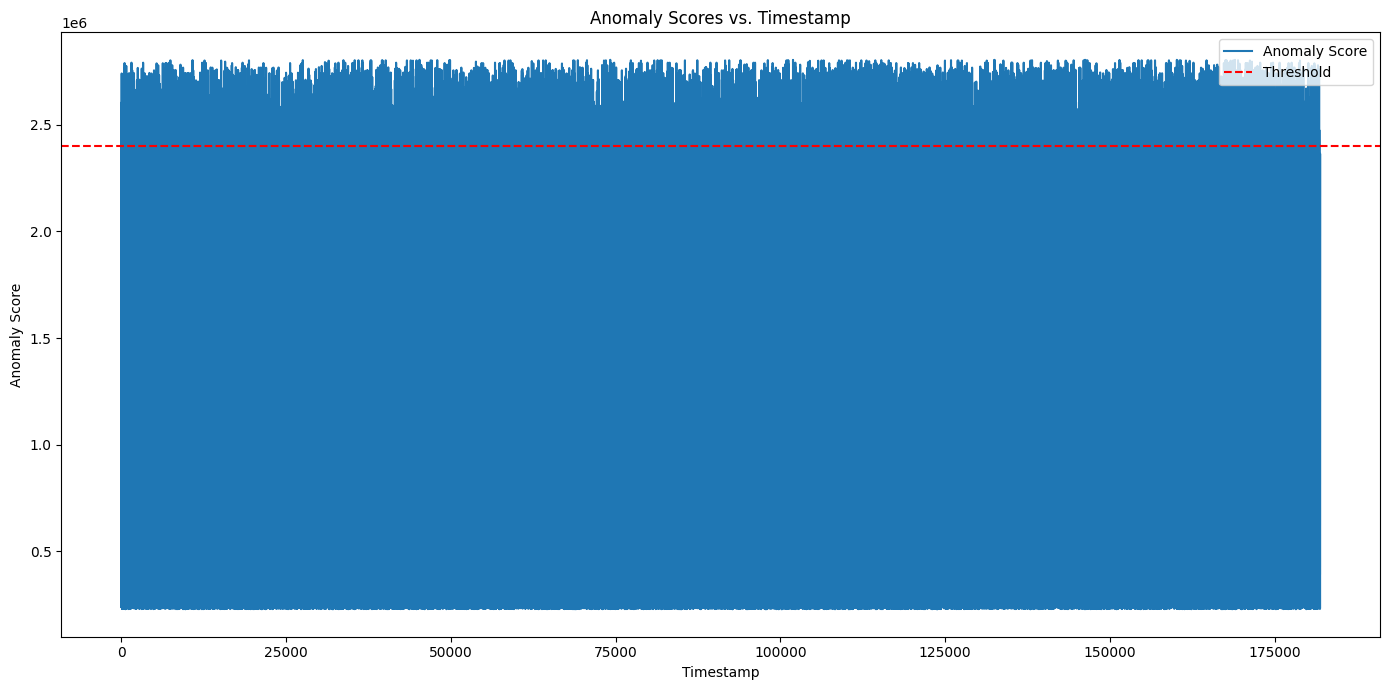

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have timestamps or some sequential data in a variable called `timestamps`
# This is just a placeholder; replace with your actual timestamp data
timestamps = range(len(ensemble_errors))

plt.figure(figsize=(14,7))
plt.plot(timestamps, ensemble_errors, label='Anomaly Score')
plt.axhline(y=ensemble_threshold, color='r', linestyle='--', label='Threshold')
plt.title('Anomaly Scores vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Anomaly Score')
plt.legend()
plt.tight_layout()
plt.show()


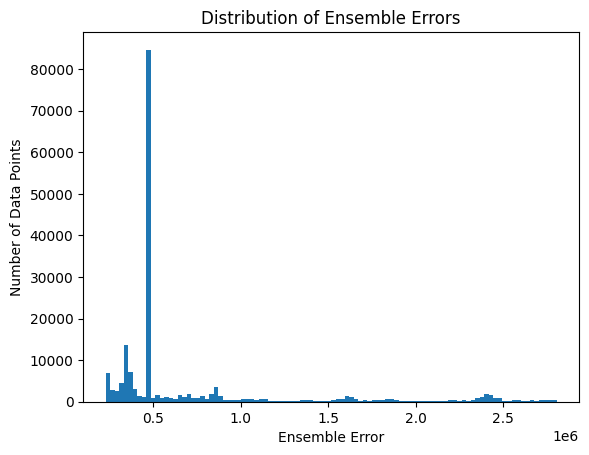

In [45]:
import matplotlib.pyplot as plt

plt.hist(ensemble_errors, bins=100)
plt.xlabel("Ensemble Error")
plt.ylabel("Number of Data Points")
plt.title("Distribution of Ensemble Errors")
plt.show()


In [46]:
mean_error = np.mean(ensemble_errors)
std_error = np.std(ensemble_errors)

# Using mean + 2*std as threshold, for instance
threshold = mean_error + 2*std_error
anomalies = ensemble_errors > threshold

print(f"Percentage of data points considered anomalies: {np.mean(anomalies) * 100:.2f}%")


Percentage of data points considered anomalies: 8.53%


Reconstruction & Loss Calculation:

In [48]:
# Ensemble Anomaly Scores
#ensemble_errors = (errors_NF + errors_NT + errors_PCH + errors_PS + errors_SB) / 5
ensemble_errors = (errors_NF + errors_PCH + errors_PS + errors_SB) / 5
normal_test_loss = ensemble_errors


Plot Histogram of Loss on Normal Test Data

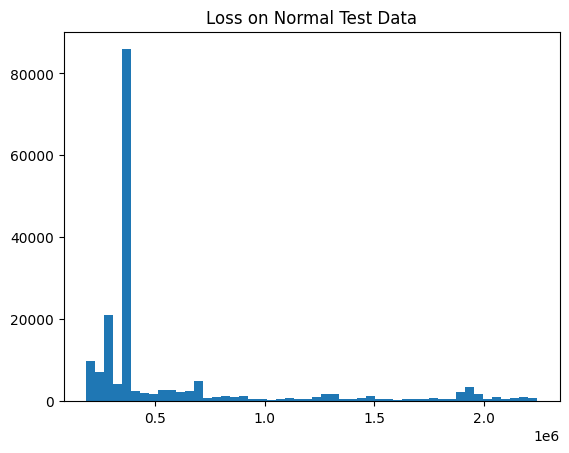

In [49]:
plt.hist(normal_test_loss, bins=50)
plt.title("Loss on Normal Test Data")
plt.show()


Calculate Threshold for Anomalies:

In [50]:
threshold = np.mean(normal_test_loss) + 2*np.std(normal_test_loss)


Compute Loss on Anomaly Test Data:

/Users/christinastodt/anaconda3/envs/AnomalyTest/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6854: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

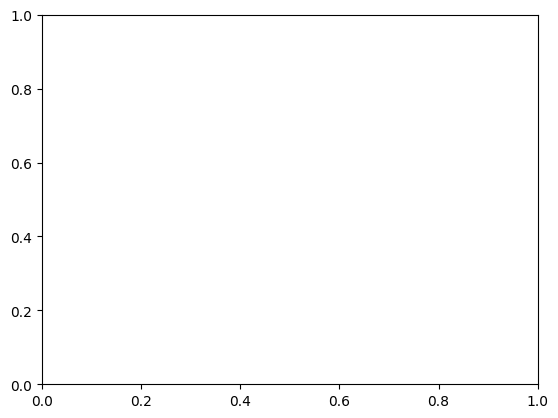

In [51]:
plt.hist(anomalies, bins=50)
plt.title("Loss on Anomaly Test Data")
plt.show()


Plot Both Losses Together with the Threshold

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

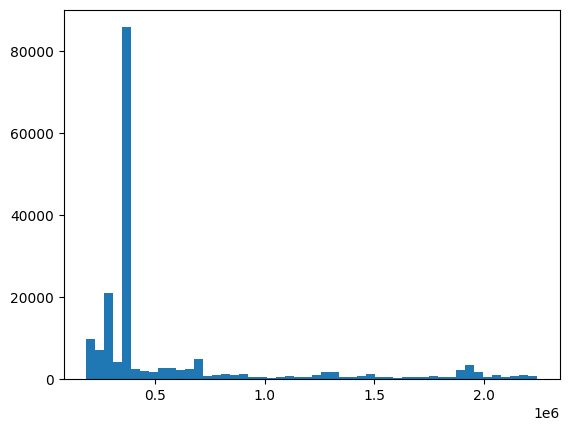

In [52]:
plt.hist(normal_test_loss, bins=50, label='normal')
plt.hist(anomalies, bins=50, label='anomaly')
plt.axvline(threshold, color='r', linewidth=3, linestyle='dashed', label='Threshold: {:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.title("Normal and Anomaly Loss")
plt.show()


Evaluate Accuracy for Normal & Anomalous Data

In [53]:
# Normal data predictions
preds_normal = normal_test_loss < threshold
accuracy_normal = np.mean(preds_normal)

# Anomaly data predictions
preds_anomaly = anomalies > threshold
accuracy_anomaly = np.mean(preds_anomaly)

print(f"Accuracy on normal data: {accuracy_normal * 100:.2f}%")
print(f"Accuracy on anomaly data: {accuracy_anomaly * 100:.2f}%")


Accuracy on normal data: 91.47%
Accuracy on anomaly data: 0.00%


In [55]:
reconstructed_NF = autoencoder_NF.predict(X_test_NF)
errors_NF = np.mean(np.square(X_test_NF - reconstructed_NF), axis=1)

5684/5684 [==============================] - 7s 1ms/step


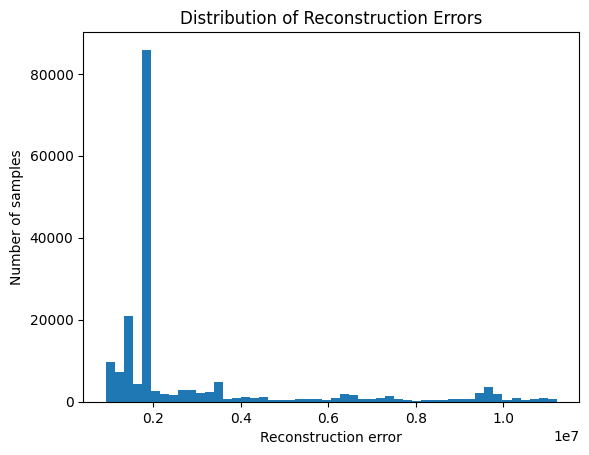

In [56]:
import matplotlib.pyplot as plt

plt.hist(errors_NF, bins=50)
plt.xlabel('Reconstruction error')
plt.ylabel('Number of samples')
plt.title('Distribution of Reconstruction Errors')
plt.show()

1/1 [==============================] - 0s 437ms/step


ValueError: cannot reshape array of size 7 into shape (28,28)

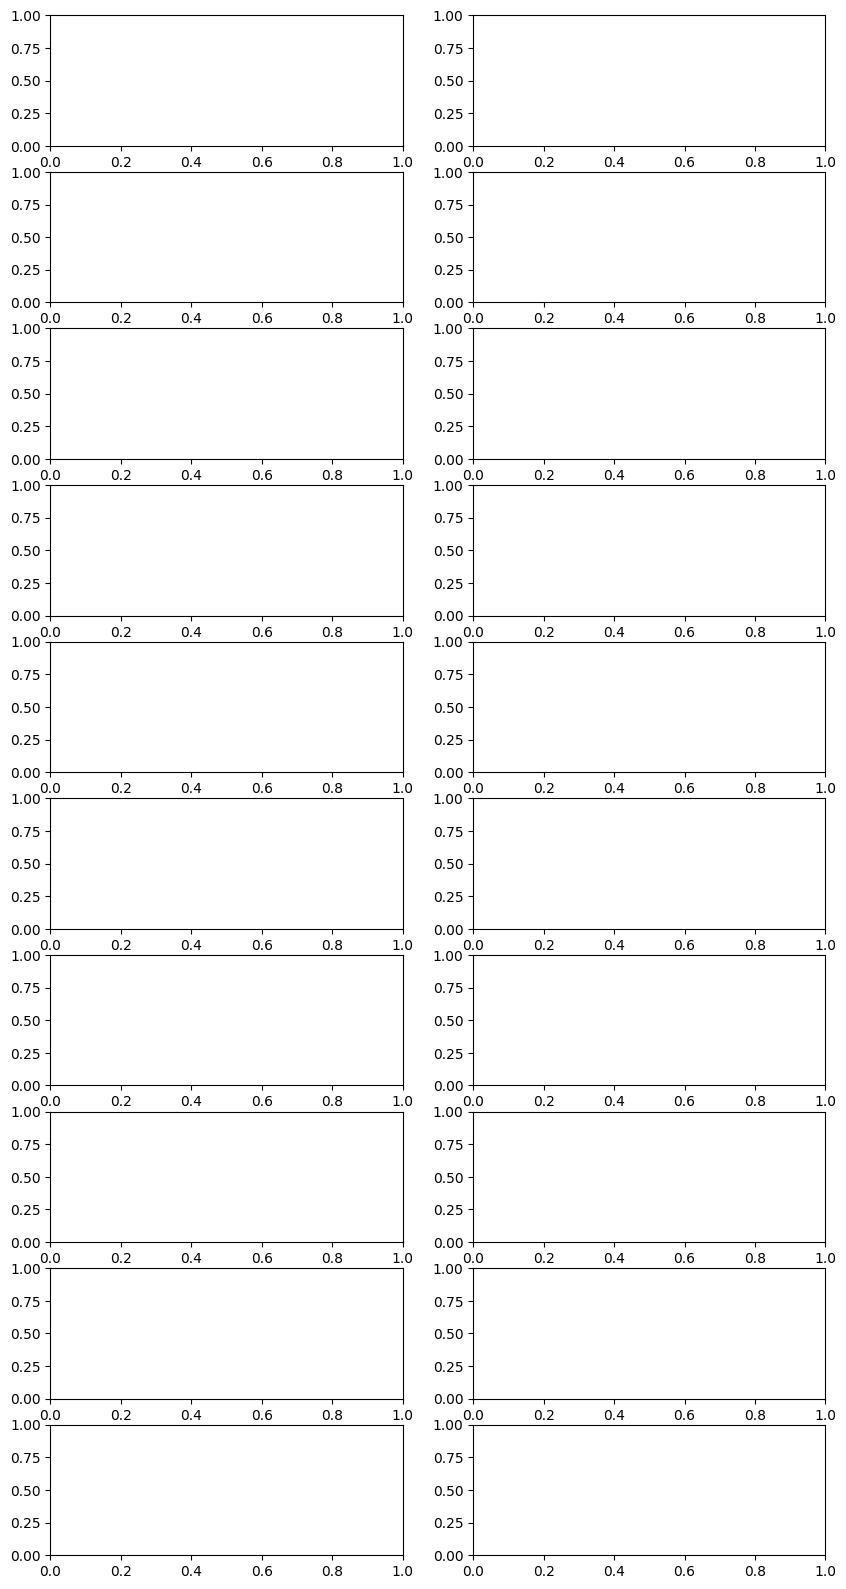

In [57]:
n = 10  # number of samples to visualize
samples = X_test_NF.iloc[:n]
reconstructed_samples = autoencoder_NF.predict(samples)

fig, axes = plt.subplots(n, 2, figsize=(10, 20))
for i in range(n):
    axes[i, 0].imshow(samples.iloc[i].values.reshape(28, 28), cmap='gray')
    axes[i, 0].set_title('Original')
    axes[i, 1].imshow(reconstructed_samples[i].reshape(28, 28), cmap='gray')
    axes[i, 1].set_title('Reconstructed')

plt.tight_layout()
plt.show()


Tests for paper: